In [111]:
# 1. Importar as Bibliotecas Necessárias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import completeness_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [112]:
data = pd.read_csv("./dataset/dados.csv")

X = data.iloc[:, :-1].values  # Excluindo a coluna 'Class' ou a última coluna
y_true = data['Class'].values  # Rótulos verdadeiros

# 3. Normalizar os Dados
scaler = StandardScaler()
x = scaler.fit_transform(X)


In [113]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [114]:
best = -1
best_i = 0
best_j = 0

for max_iter in (100,200,300,400,500,600,700,800,900,1000):
    kmeans = KMeans(n_clusters=2, max_iter=max_iter, random_state=0)
    kmeans.fit(x)

    Completude = metrics.completeness_score(y_true,kmeans.labels_)

    if(Completude > best):
        best_j = max_iter

kmeans = KMeans(n_clusters=2, max_iter=best_j, random_state=0)
labels_pred = kmeans.fit_predict(X_pca)

print("\nCoesão: ", math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(x,kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y_true,kmeans.labels_))

print("\nSeparação: ", pairwise_distances(kmeans.cluster_centers_).mean())

print("\nRand Score K-means: ",metrics.rand_score(y_true, kmeans.labels_))

print("\nCompletude: ", completeness_score(y_true, kmeans.labels_))

print("\nEntropia: ", entropy(np.bincount(kmeans.labels_)/len(kmeans.labels_)))



Coesão:  26.767870915985878

Coeficiente de Silhueta:  0.082865772472744

Homogeneidade :  0.00021532341645099257

Separação:  1.285792567792721

Rand Score K-means:  0.5009589589589589

Completude:  0.00019108852168349855

Entropia:  0.6883374644776967


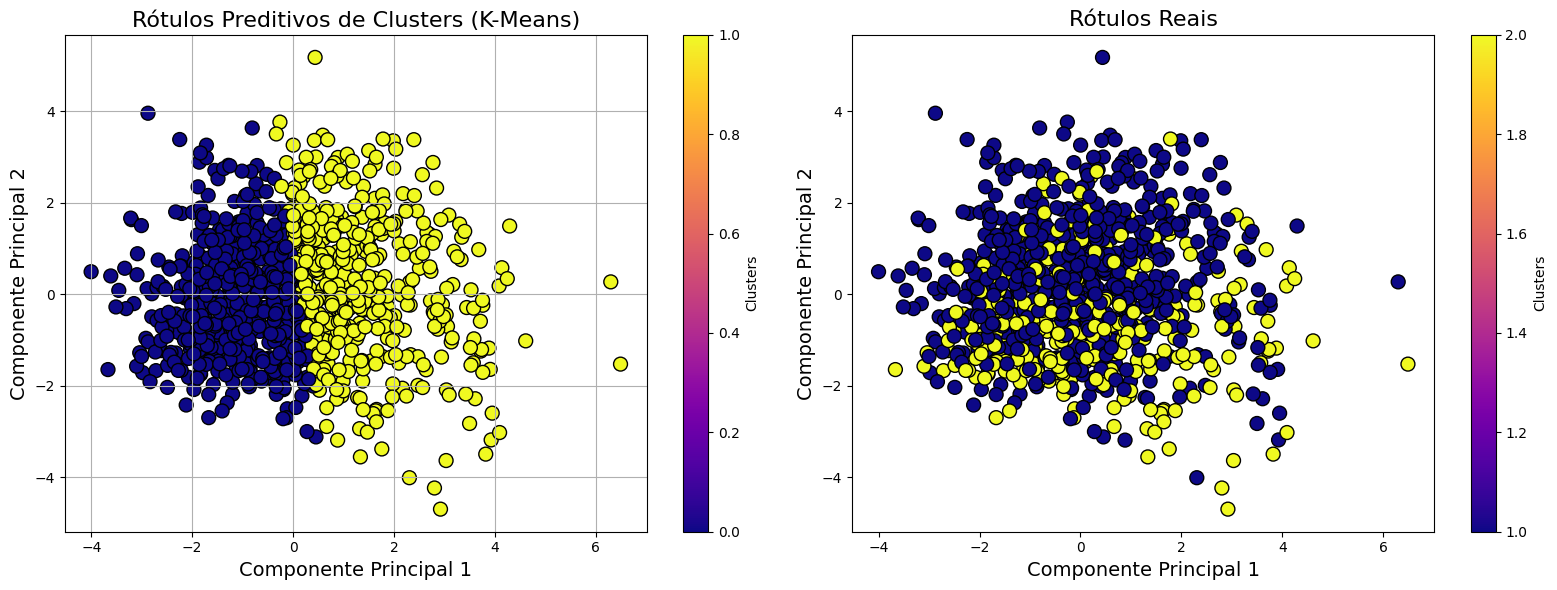

In [115]:
# Função para plotar os resultados
plt.figure(figsize=(16, 6))    
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')

# Segundo Subplot: Rótulos Preditivos de Clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Preditivos de Clusters (K-Means)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')
plt.grid(True)

# Salvar a Figura
plt.tight_layout()
plt.savefig('clusters_e_classes_scikit_learn.png')
plt.show()



In [116]:
best = -1
best
for eps in (0.1, 0.2, 0.3, 0.4, 0.5):
    for min_samples in (3, 5, 7, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(x)

        labels = dbscan.labels_

In [117]:
for n_clusters in (2, 3, 4, 5, 6):
    for linkage in ('ward', 'complete', 'average', 'single'):
        agnes = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        agnes.fit(x)

        labels = agnes.labels_